In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [4]:
data = pd.DataFrame({
    'Size_sqft': [500, 700, 1000, 1200, 1500, 2500, 2600, 2700, 4000, 10000],  # last one is outlier
    'Rooms': [2, 3, 3, 4, 4, 5, 5, 6, 7, 10],
    'City': ['Chennai', 'Mumbai', 'Chennai', 'Delhi', 'Delhi', 'Mumbai', 'Mumbai', 'Chennai', 'Delhi', 'Chennai'],
    'Condition': ['Good', 'Average', 'Good', 'Excellent', 'Average', 'Good', 'Good', 'Poor', 'Excellent', 'Poor'],
    'Price_lakhs': [30, 45, 65, 80, 100, 150, 155, 160, 200, 500]  # target
})

In [5]:
data.head()

,Size_sqft,Rooms,City,Condition,Price_lakhs
0,500,2,Chennai,Good,30
1,700,3,Mumbai,Average,45
2,1000,3,Chennai,Good,65
3,1200,4,Delhi,Excellent,80
4,1500,4,Delhi,Average,100


In [36]:
data1=data[["Size_sqft" , "Rooms"]]
y=data[["Price_lakhs"]]

In [37]:
y

,Price_lakhs
0,30
1,45
2,65
3,80
4,100
5,150
6,155
7,160
8,200
9,500


In [38]:
X_train,X_test,y_train,y_test=train_test_split(data1,y,test_size=0.2,random_state=42)

In [39]:
X_train,y_train

(   Size_sqft  Rooms
 5       2500      5
 0        500      2
 7       2700      6
 2       1000      3
 9      10000     10
 4       1500      4
 3       1200      4
 6       2600      5,
    Price_lakhs
 5          150
 0           30
 7          160
 2           65
 9          500
 4          100
 3           80
 6          155)

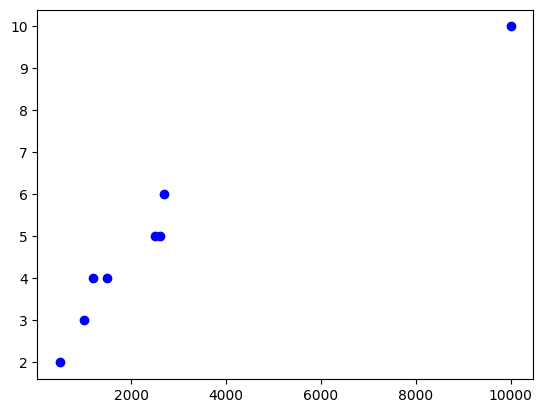

In [20]:
plt.scatter(x=X_train["Size_sqft"],y=X_train["Rooms"],color="blue", label=LinearRegression())

In [58]:
model=LinearRegression()
y_pred=model.fit(X_train["Rooms"],y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [41]:
model.coef_[0]

array([ 0.04004124, 10.8371661 ])

In [32]:
import numpy as np
x=np.array(data1)
y=np.array(y)


In [42]:
x,y

(array([[  500,     2],
        [  700,     3],
        [ 1000,     3],
        [ 1200,     4],
        [ 1500,     4],
        [ 2500,     5],
        [ 2600,     5],
        [ 2700,     6],
        [ 4000,     7],
        [10000,    10]]),
    Price_lakhs
 0           30
 1           45
 2           65
 3           80
 4          100
 5          150
 6          155
 7          160
 8          200
 9          500)

In [47]:
print(data1.size)
print(y.size)

20
10


In [53]:
y_pred=model.predict(X_test)
y_pred,y

(array([[228.08052201],
        [ 52.59578132]]),
    Price_lakhs
 0           30
 1           45
 2           65
 3           80
 4          100
 5          150
 6          155
 7          160
 8          200
 9          500)

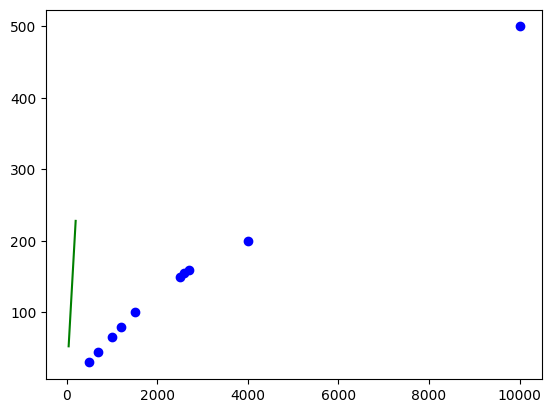

In [57]:
plt.scatter(data1['Size_sqft'],y,color='blue',label='Actual data')
plt.plot(y_test["Price_lakhs"],y_pred,color="green",label="Regression line")

In [4]:
data['Area_duplicate'] = data['Size_sqft'] * 1.01

In [6]:
X = data.drop('Price_lakhs', axis=1)
y = data['Price_lakhs']

In [8]:
X

,Size_sqft,Rooms,City,Condition,Area_duplicate
0,500,2,Chennai,Good,505.0
1,700,3,Mumbai,Average,707.0
2,1000,3,Chennai,Good,1010.0
3,1200,4,Delhi,Excellent,1212.0
4,1500,4,Delhi,Average,1515.0
5,2500,5,Mumbai,Good,2525.0
6,2600,5,Mumbai,Good,2626.0
7,2700,6,Chennai,Poor,2727.0
8,4000,7,Delhi,Excellent,4040.0
9,10000,10,Chennai,Poor,10100.0


In [9]:
categorical_cols = ['City', 'Condition']
numerical_cols = ['Size_sqft', 'Rooms', 'Area_duplicate']

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [11]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Size_sqft', 'Rooms',
                                                   'Area_duplicate']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['City', 'Condition'])])),
                ('regressor', LinearRegression())])

In [16]:
y_pred = model.predict(X_test)

print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Mean Squared Error: 573.8213422487365
R² Score: 0.9044626277213342


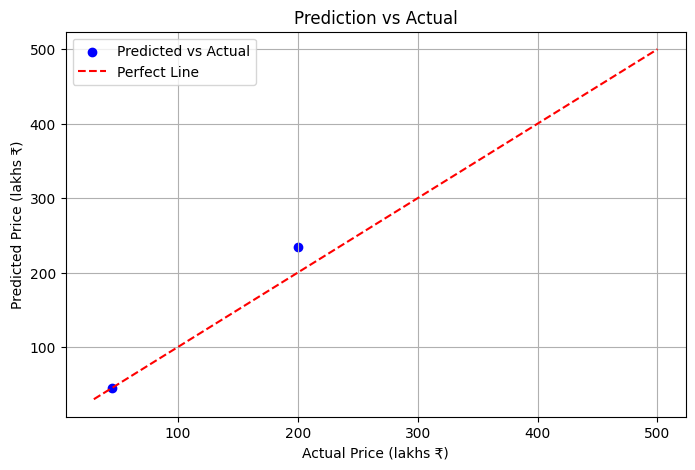

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Line')
plt.xlabel('Actual Price (lakhs ₹)')
plt.ylabel('Predicted Price (lakhs ₹)')
plt.title('Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.show()
